In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Прочитайте csv файл (використовуйте функцію read_csv)

In [2]:
PATH = 'data/'
df = pd.read_csv(os.path.join(PATH, 'bestsellers_with_categories.csv'))
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Виведіть перші п'ять рядків (використовується функція head)

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [4]:
df.shape

(550, 7)

In [25]:
count = df['name'].drop_duplicates().count()
print(f'Про скільки книг зберігає дані датасет?\nВідповідь: {count}')


Про скільки книг зберігає дані датасет?
Відповідь: 351


In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


<h1><center>Первинне дослідження даних<center><h1>

In [7]:
df_null = df.isnull().sum()
df_null

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [8]:
question = 'Чи є в якихось змінних пропуски?'
answer = 'Hi'
for k, v in df_null.items():
    if v != 0:
        answer = 'Так'
print(f'{question}\nВідповідь: {answer}')

Чи є в якихось змінних пропуски?
Відповідь: Hi


Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [9]:
q = 'Які є унікальні жанри?'
a = []
for i in df.genre.unique():
    a.append(i)
print(f'{q}\nВідповідь: {', '.join(a)}')

Які є унікальні жанри?
Відповідь: Non Fiction, Fiction


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: xlabel='Books', ylabel='Price'>

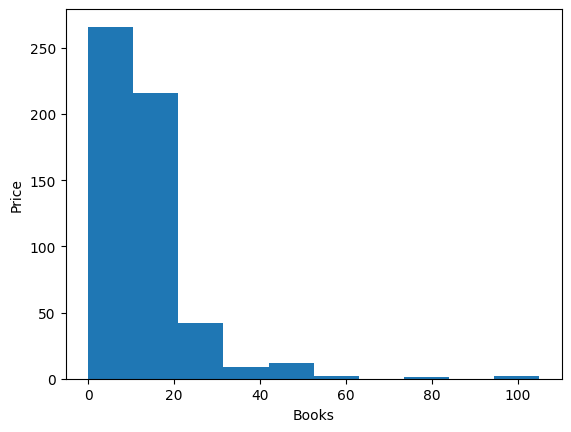

In [10]:
df.price.plot.hist(xlabel='Books', ylabel='Price')

In [11]:
print(f'Максимальна ціна - {df.price.max()}')
print(f'Мінімальна ціна - {df.price.min()}')
print(f'Середня ціна - {df.price.mean()}')
print(f'Медіанна ціна - {df.price.median()}')

Максимальна ціна - 105
Мінімальна ціна - 0
Середня ціна - 13.1
Медіанна ціна - 11.0


<h1><center>Пошук та сортування даних<center><h1>

In [12]:
q = 'Який рейтинг у датасеті найвищий?'
print(f'{q}\nВідповідь: {df.user_rating.max()}')

Який рейтинг у датасеті найвищий?
Відповідь: 4.9


In [13]:
q = 'Скільки книг мають такий рейтинг?'
max_rating = df['user_rating'].max()
print(f'{q}\nВідповідь: {df.user_rating.value_counts()[max_rating]}')

Скільки книг мають такий рейтинг?
Відповідь: 52


In [14]:
q = 'Яка книга має найбільше відгуків?'
print(f'{q}\nВідповідь:\n{df.loc[df.reviews.idxmax()]}')


Яка книга має найбільше відгуків?
Відповідь:
name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [15]:
q = 'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:'
print(f'{q}')
df[(df['year'] == 2015)].nlargest(50, 'user_rating').nlargest(1, 'price')

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:


,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [16]:
q = 'Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?'
a = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
print(f'{q}\nВідповідь: {len(a)}')

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
Відповідь: 20


In [17]:
q = 'Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?'
a = len(df[(df['user_rating'] == 4.9) & (df['year'].isin([2010,2011]))])
print(f'{q}\nВідповідь: {a}')

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
Відповідь: 1


насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [18]:
sort_values = df[(df['year'] == 2015) & (df['price'] > 8)].sort_values('price')
sort_values

,name,author,user_rating,reviews,price,year,genre
295,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,4.7,9366,9,2015,Non Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
362,The Day the Crayons Quit,Drew Daywalt,4.8,8922,9,2015,Fiction
158,Harry Potter Coloring Book,Scholastic,4.7,3564,9,2015,Non Fiction
99,Enchanted Forest: An Inky Quest and Coloring b...,Johanna Basford,4.7,5413,9,2015,Non Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
23,American Sniper: The Autobiography of the Most...,Chris Kyle,4.6,15921,9,2015,Non Fiction
234,Mindset: The New Psychology of Success,Carol S. Dweck,4.6,5542,10,2015,Non Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
167,How to Win Friends & Influence People,Dale Carnegie,4.7,25001,11,2015,Non Fiction


In [19]:
q = 'Яка книга остання у відсортованому списку?'
a = sort_values.iloc[-1]
print(f'{q}\nВідповідь: \n{a}')

Яка книга остання у відсортованому списку?
Відповідь: 
name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


<h1><center>Агрегування даних та з'єднання таблиць<center><h1>

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [20]:
a = df.groupby('genre')['price'].agg(['max', 'min'])
print(f'Максимальна ціна для жанру Fiction?\nВідповідь: {a.loc['Fiction', 'max']}')
print(f'Мінімальна ціна для жанру Fiction?\nВідповідь: {a.loc['Fiction', 'min']}')
print(f'Максимальна ціна для жанру Non Fiction?\nВідповідь: {a.loc['Non Fiction', 'max']}')
print(f'Мінімальна ціна для жанру Non Fiction?\nВідповідь: {a.loc['Non Fiction', 'min']}')

Максимальна ціна для жанру Fiction?
Відповідь: 82
Мінімальна ціна для жанру Fiction?
Відповідь: 0
Максимальна ціна для жанру Non Fiction?
Відповідь: 105
Мінімальна ціна для жанру Non Fiction?
Відповідь: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [21]:
df_count = df.groupby('author').size().reset_index(name='book_count')
print(f'Якої розмірності вийшла таблиця?\nВідповідь: {df_count.shape[0]}')
print(f'Який автор має найбільше книг?\nВідповідь: {df_count.loc[df_count['book_count'].idxmax()].author}')
print(f'Скільки книг цього автора?\nВідповідь: {df_count.loc[df_count['book_count'].idxmax()].book_count}')

Якої розмірності вийшла таблиця?
Відповідь: 248
Який автор має найбільше книг?
Відповідь: Jeff Kinney
Скільки книг цього автора?
Відповідь: 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [22]:
df_author_rating = df.groupby('author')['user_rating'].mean().reset_index(name='average_author_rating')
print(f'У якого автора середній рейтинг мінімальний?\nВідповідь: {df_author_rating.loc[df_author_rating['average_author_rating'].idxmin()].author}')
print(f'Який у цього автора середній рейтинг?\nВідповідь: {df_author_rating.loc[df_author_rating['average_author_rating'].idxmin()].average_author_rating}')

У якого автора середній рейтинг мінімальний?
Відповідь: Donna Tartt
Який у цього автора середній рейтинг?
Відповідь: 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [23]:
final_res = pd.concat([df_count, df_author_rating.drop('author', axis=1)], axis=1)
final_res.sort_values(by=['book_count', 'average_author_rating'], inplace=True)
print(f'Який автор перший у списку?\nВідповідь: \n{final_res.iloc[0]}')

Який автор перший у списку?
Відповідь: 
author                   Muriel Barbery
book_count                            1
average_author_rating               4.0
Name: 171, dtype: object
